# travelTime Analysis

Different analyses of data collected using https://github.com/amadeuspzs/travelTime/blob/master/travelTime.py

In [28]:
%matplotlib inline
import pandas as pd, math, matplotlib.pyplot as plt
from datetime import datetime
from utils import find_weeks, find_days # custom

## Load data

In [3]:
filename = 'data/home-montauk.csv'
title = "Home to Montauk Driving Duration (h)"
data = pd.read_csv(filename)
data.head(5)

,Timestamp,Duration(s)
0,1498920001,9472
1,1498920602,9498
2,1498921202,9646
3,1498921801,9698
4,1498922401,9679


Convert the unix timestamp to a datetime object:

In [4]:
data['Timestamp']=data.apply(lambda row: datetime.fromtimestamp(int(row['Timestamp'])),axis=1)
data.head(5)

,Timestamp,Duration(s)
0,2017-07-01 10:40:01,9472
1,2017-07-01 10:50:02,9498
2,2017-07-01 11:00:02,9646
3,2017-07-01 11:10:01,9698
4,2017-07-01 11:20:01,9679


Add a new column with the duration in hours

In [5]:
data['Duration(h)']=data.apply(lambda row: float(row['Duration(s)'])/(60*60),axis=1)
data.head(5)

,Timestamp,Duration(s),Duration(h)
0,2017-07-01 10:40:01,9472,2.631111
1,2017-07-01 10:50:02,9498,2.638333
2,2017-07-01 11:00:02,9646,2.679444
3,2017-07-01 11:10:01,9698,2.693889
4,2017-07-01 11:20:01,9679,2.688611


Let's have a quick visualization:

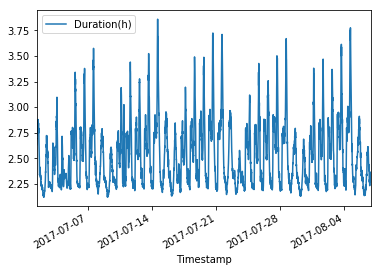

In [6]:
ax = data.plot(x='Timestamp',y='Duration(h)')

# Week by Week plots

Identify weeks in the dataset and plot them:

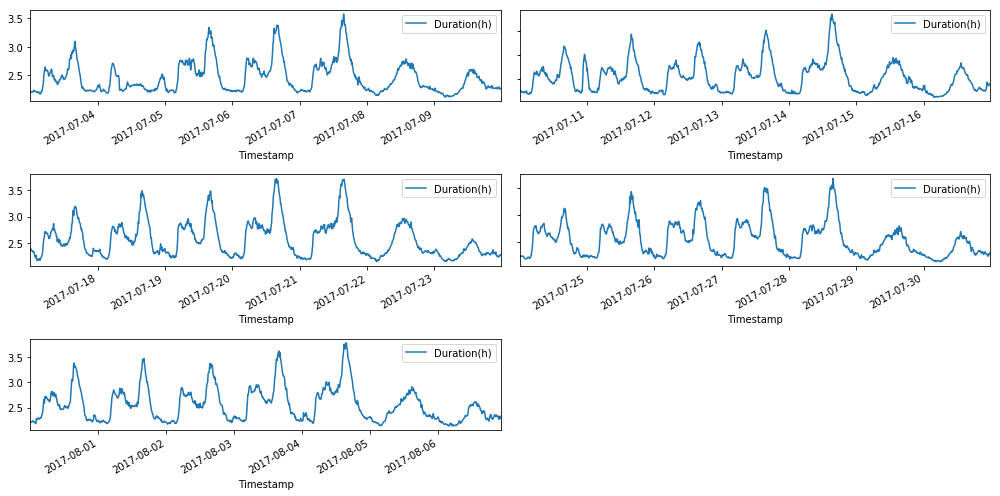

In [69]:
# todo: set ylim across rows, and disable jupyter scroll
weeks = find_weeks(data)
num_cols = 2
num_rows = int(math.ceil(len(weeks) / float(num_cols)))
plt.figure(1,figsize=(14, 7))
for e, week in enumerate(weeks):
    ax = plt.subplot(num_rows,num_cols,e+1)
    data.iloc[week[0]:week[1]].plot(x='Timestamp',y='Duration(h)',ax=ax, sharey=True)
plt.tight_layout()

# Day plots

Pick a day to compare across weeks:

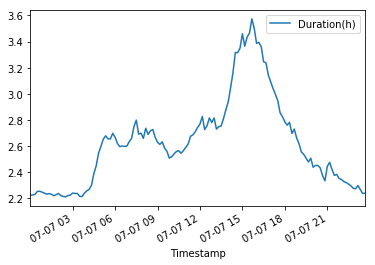

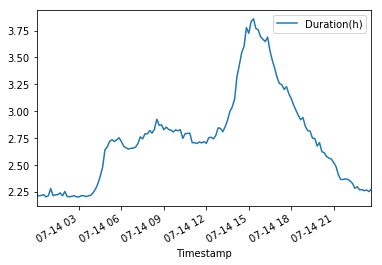

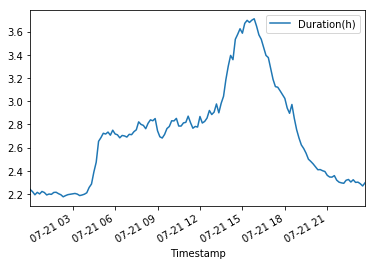

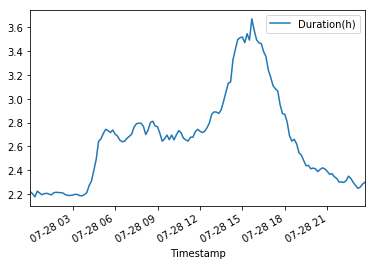

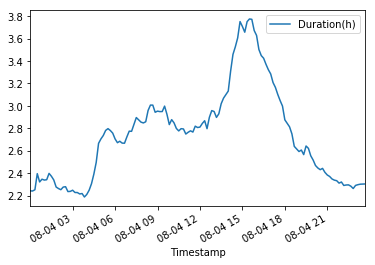

In [9]:
fridays = find_days(data,5)
for friday in fridays:
    ax = data.iloc[friday[0]:friday[1]].plot(x='Timestamp',y='Duration(h)')